In [1]:
import numpy as np
import pandas as pd
import datetime as datetime
import pandas_datareader.data as web
#import quandl
import blpapi
from xbbg import blp

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import MacroRiskIndictators as mri



In [2]:
import importlib
import MacroRiskIndictators as mri


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt


In [4]:
index_list = ['MID Index','RTY Index','RLG Index','RLV Index', 'NDX Index',
              'UKX Index','NKY Index','SPTSX Index','DAX Index','CAC Index','MXEA Index',
              'MXEF Index','MXCN Index','IBOV Index','HSI Index',
              'FNER Index','LPX50TR Index',
              'S5CPGS Index','S5CONS Index','S5UTIL Index','S5SEQX Index',
              'LF98TRUU Index','LCANTRDU Index','I165686 Index','LUACTRUU Index','LD08TRUU Index',
              'H2173EU Index','CSLLLTOT Index','JPCAUS3M Index',
              'US0003M Index', 'USSOC Curncy','GB03 Govt','USSP2 BGN Curncy',   
              'GT02 Govt','GT05 Govt','GT10 Govt','USYC2Y10 Index','USYC5Y10 Index',
              'SPGSCI Index','CO1 Comdty','XAU Curncy','DXY Curncy','JPY Curncy','EUR Curncy','GBP Curncy','CHF Curncy']  #'USOSFR20 Curncy',

yields =  ['US0003M Index', 'USSOC Curncy','GB03 Govt','USSP2 BGN Curncy',
              'GT02 Govt','GT05 Govt','GT10 Govt','USYC2Y10 Index','USYC5Y10 Index']




In [7]:
file = 'C:/Users/jknechtel/Documents/Equity Risk Modeling/FactorTSraw_hist.xlsx'
import CLO_SQL_Updated as cs

def get_AlladinFactorSeries(file,writeOutput=False):
    usfinds = pd.read_excel(file,sheet_name='USAM',index_col=[0],parse_dates=['date'])
    cafinds = pd.read_excel(file,sheet_name='CAND',index_col=[0],parse_dates=['date'])
    wldfinds = pd.read_excel(file,sheet_name='WRLD',index_col=[0],parse_dates=['date'])
    
    if writeOutput:
        cs.insertTable(usfinds,'EQ_USFactorIndices')
        cs.insertTable(cafinds,'EQ_CAFactorIndices')
        cs.insertTable(wldfinds,'EQ_WLDFactorIndices')
        
    usfrets = usfinds.pct_change()
    cafrets = cafinds.pct_change()
    wldfrets = wldfinds.pct_change()
    
    return usfinds, cafinds, wldfinds, usfrets, cafrets, wldfrets
        
    

In [8]:
#importlib.reload(mri)
file = 'C:/Users/jknechtel/Documents/Equity Risk Modeling/FactorTSraw_hist.xlsx'
usfinds, cafinds, wldfinds, usfrets, cafrets, wldfrets = mri.get_AlladinFactorSeries(file,writeOutput=False)

In [9]:
importlib.reload(mri)
returns, prices = mri.get_Index_rets(start_date='1998-12-31',call = True)


<module 'MacroRiskIndictators' from 'C:\\Users\\jknechtel\\Miniconda3\\GSS\\MacroRiskIndictators.py'>

In [10]:
#index_ntr = index_ntr.ffill(limit=2)
for c in prices.columns:
    print(c,": ", prices[c].first_valid_index())

MID Index :  1999-01-01 00:00:00
RTY Index :  1999-01-01 00:00:00
RLG Index :  1999-01-01 00:00:00
RLV Index :  1999-01-01 00:00:00
NDX Index :  1999-01-01 00:00:00
UKX Index :  1999-01-08 00:00:00
NKY Index :  1999-01-08 00:00:00
SPTSX Index :  1999-01-01 00:00:00
DAX Index :  1999-01-08 00:00:00
CAC Index :  1999-01-08 00:00:00
MXEA Index :  1999-01-01 00:00:00
MXEF Index :  1999-01-01 00:00:00
MXCN Index :  1999-01-01 00:00:00
IBOV Index :  1999-01-08 00:00:00
HSI Index :  1999-01-01 00:00:00
FNER Index :  1999-01-01 00:00:00
LPX50TR Index :  1999-01-01 00:00:00
S5CPGS Index :  1999-01-01 00:00:00
S5CONS Index :  1999-01-01 00:00:00
S5UTIL Index :  1999-01-01 00:00:00
LF98TRUU Index :  1999-01-01 00:00:00
LCANTRDU Index :  2002-10-04 00:00:00
LUACTRUU Index :  1999-01-01 00:00:00
LD08TRUU Index :  1999-01-01 00:00:00
CSLLLTOT Index :  1999-01-01 00:00:00
JPCAUS3M Index :  1999-01-01 00:00:00
US0003M Index :  1999-01-01 00:00:00
USSOC Curncy :  2001-12-07 00:00:00
GB03 Govt :  1999-0

In [11]:
#returns.drop(columns=['HFRIFWI Index'],inplace=True)
#prices.drop(columns=['HFRIFWI Index'],inplace=True)

In [12]:
#index_rets.drop(columns=['MXEA Index'],inplace=True)
#historical_sample = index_rets.iloc[:680, 1:]


corr = returns.corr()
pd.options.display.float_format = "{:,.2}".format  
corr.style.background_gradient(cmap='RdBu').set_precision(2)

C:\Users\JKNECH~1\AppData\Local\Temp/ipykernel_26344/1539980612.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='RdBu').set_precision(2)


,MID Index,RTY Index,RLG Index,RLV Index,NDX Index,UKX Index,NKY Index,SPTSX Index,DAX Index,CAC Index,MXEA Index,MXEF Index,MXCN Index,IBOV Index,HSI Index,FNER Index,LPX50TR Index,S5CPGS Index,S5CONS Index,S5UTIL Index,LF98TRUU Index,LCANTRDU Index,LUACTRUU Index,LD08TRUU Index,CSLLLTOT Index,JPCAUS3M Index,US0003M Index,USSOC Curncy,GB03 Govt,USSP2 BGN Curncy,GT02 Govt,GT05 Govt,GT10 Govt,USYC2Y10 Index,USYC5Y10 Index,SPGSCI Index,CO1 Comdty,XAU Curncy,DXY Curncy,JPY Curncy,EUR Curncy,GBP Curncy,CHF Curncy
MID Index,1.00,0.97,0.91,0.95,0.84,0.79,0.63,0.83,0.78,0.78,0.81,0.72,0.52,0.67,0.57,0.78,0.82,0.90,0.69,0.62,0.64,-0.01,0.10,-0.02,0.45,-0.01,-0.06,0.17,0.14,-0.11,0.28,0.34,0.34,0.17,0.03,0.40,0.32,0.10,-0.27,0.23,0.24,0.32,-0.08
RTY Index,0.97,1.00,0.88,0.91,0.83,0.75,0.62,0.78,0.76,0.76,0.77,0.70,0.50,0.64,0.55,0.75,0.80,0.87,0.64,0.56,0.61,-0.03,0.06,-0.04,0.41,-0.02,-0.04,0.16,0.12,-0.10,0.28,0.34,0.35,0.18,0.03,0.36,0.29,0.08,-0.25,0.23,0.21,0.30,-0.07
RLG Index,0.91,0.88,1.00,0.90,0.95,0.76,0.61,0.78,0.77,0.76,0.78,0.70,0.53,0.63,0.55,0.69,0.78,0.85,0.75,0.60,0.60,-0.01,0.09,0.00,0.41,-0.00,-0.08,0.16,0.14,-0.14,0.28,0.33,0.32,0.13,-0.02,0.33,0.26,0.05,-0.23,0.23,0.20,0.28,-0.05
RLV Index,0.95,0.91,0.90,1.00,0.81,0.82,0.63,0.82,0.79,0.80,0.82,0.70,0.50,0.67,0.57,0.76,0.82,0.92,0.77,0.66,0.64,-0.02,0.09,-0.03,0.46,-0.00,-0.07,0.17,0.14,-0.13,0.29,0.36,0.35,0.17,0.00,0.38,0.31,0.04,-0.26,0.24,0.22,0.31,-0.06
NDX Index,0.84,0.83,0.95,0.81,1.00,0.69,0.57,0.70,0.72,0.71,0.71,0.66,0.52,0.58,0.54,0.61,0.71,0.77,0.66,0.50,0.52,-0.03,0.04,-0.01,0.35,-0.02,-0.05,0.16,0.15,-0.12,0.29,0.33,0.32,0.12,-0.03,0.27,0.22,0.01,-0.17,0.23,0.14,0.22,-0.00
UKX Index,0.79,0.75,0.76,0.82,0.69,1.00,0.63,0.79,0.85,0.89,0.85,0.72,0.52,0.63,0.60,0.58,0.77,0.75,0.63,0.53,0.56,-0.05,0.05,-0.02,0.37,0.01,-0.06,0.21,0.18,-0.10,0.27,0.32,0.32,0.14,0.01,0.38,0.33,0.03,-0.14,0.27,0.11,0.13,0.01
NKY Index,0.63,0.62,0.61,0.63,0.57,0.63,1.00,0.60,0.64,0.67,0.75,0.66,0.58,0.49,0.62,0.43,0.68,0.59,0.45,0.41,0.52,0.01,0.10,-0.05,0.37,-0.03,-0.01,0.21,0.18,-0.13,0.25,0.29,0.27,0.10,-0.03,0.29,0.22,-0.03,-0.11,0.40,0.10,0.25,0.02
SPTSX Index,0.83,0.78,0.78,0.82,0.70,0.79,0.60,1.00,0.72,0.75,0.80,0.75,0.56,0.68,0.59,0.60,0.77,0.75,0.58,0.56,0.62,0.06,0.13,0.02,0.46,0.04,-0.11,0.20,0.21,-0.14,0.23,0.29,0.29,0.13,-0.00,0.52,0.45,0.21,-0.27,0.18,0.22,0.32,-0.10
DAX Index,0.78,0.76,0.77,0.79,0.72,0.85,0.64,0.72,1.00,0.93,0.84,0.70,0.52,0.60,0.58,0.56,0.77,0.76,0.61,0.48,0.52,-0.07,0.00,-0.05,0.36,-0.00,-0.01,0.21,0.16,-0.08,0.31,0.38,0.38,0.18,0.01,0.31,0.26,-0.01,-0.12,0.29,0.07,0.23,0.03
CAC Index,0.78,0.76,0.76,0.80,0.71,0.89,0.67,0.75,0.93,1.00,0.87,0.71,0.53,0.61,0.60,0.55,0.80,0.76,0.60,0.49,0.54,-0.09,0.00,-0.07,0.36,-0.00,-0.03,0.22,0.18,-0.10,0.30,0.37,0.37,0.18,0.01,0.34,0.29,-0.01,-0.13,0.31,0.09,0.24,0.02


<module 'MacroRiskIndictators' from 'C:\\Users\\jknechtel\\Miniconda3\\GSS\\MacroRiskIndictators.py'>

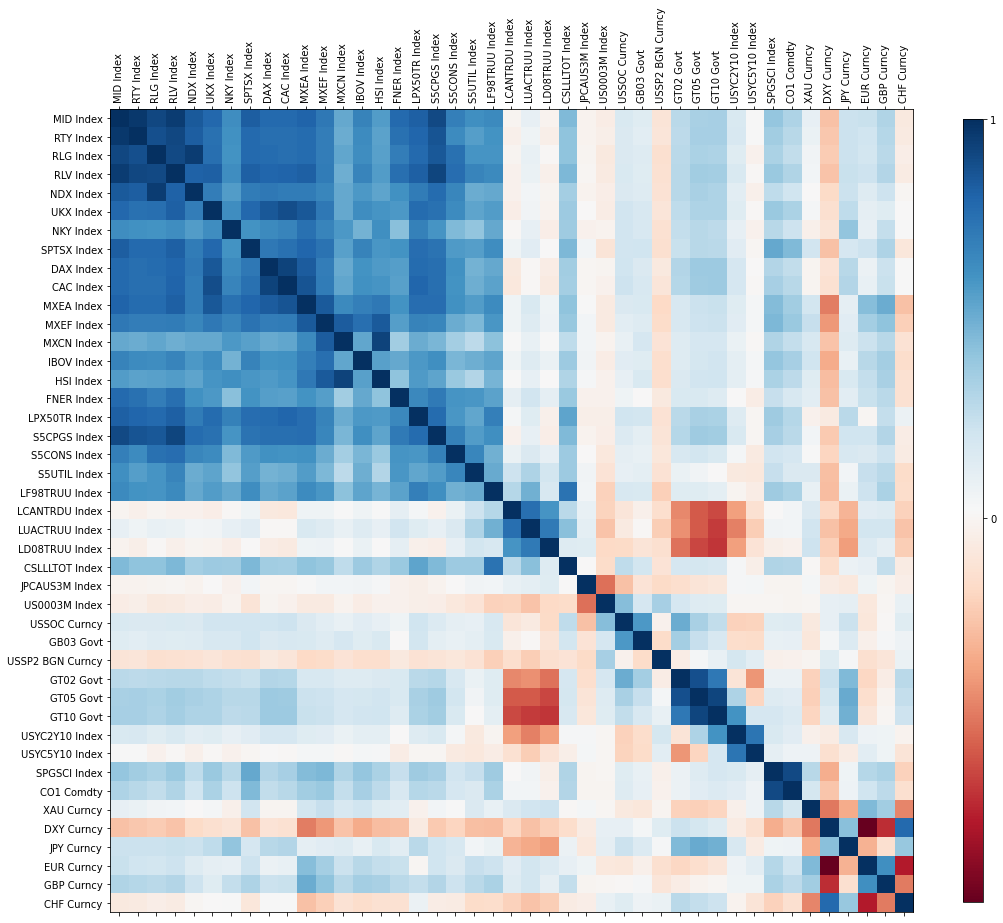

In [13]:
importlib.reload(mri)
mri.plot_corr(returns,size=18)

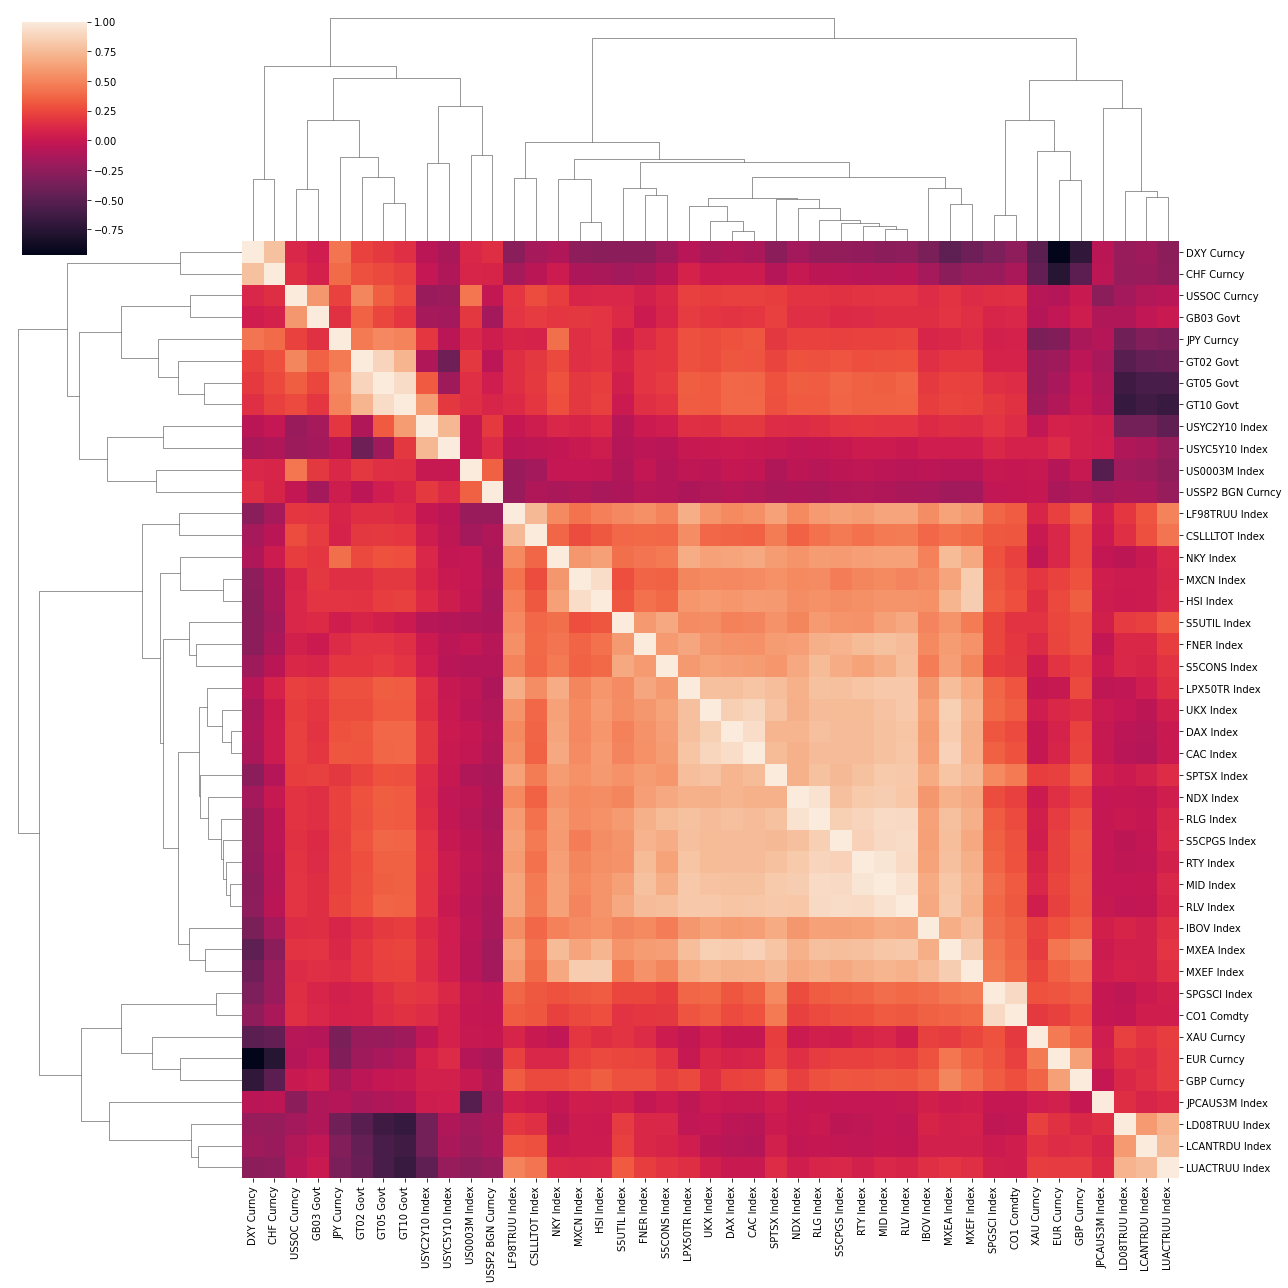

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.clustermap(returns.corr(), figsize=(18,18),  yticklabels=True)
#plt.savefig('heatmap_with_Seaborn_clustermap_python.jpg')

In [15]:
#sns.clustermap(returns.iloc[:,1:].T, col_cluster=False, figsize=(18,18),  yticklabels=True)

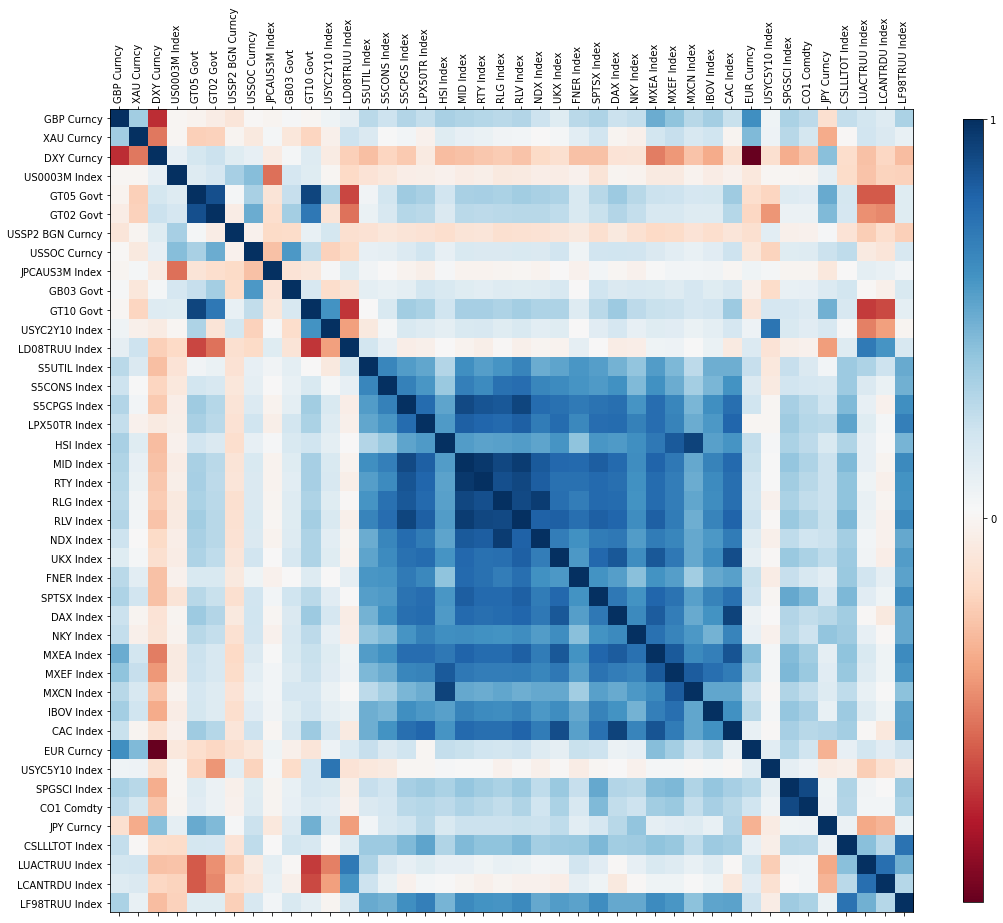

In [16]:
import scipy
import scipy.cluster.hierarchy as sch

X = returns.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [returns.columns.tolist()[i] for i in list((np.argsort(ind)))]
#returns = returns.reindex_axis(columns, axis=1)

mri.plot_corr(returns[columns], size=18)

In [17]:
from scipy.spatial import distance
turbulence = mri.calculate_turbulence(returns, initial_window_size=250)

In [18]:
turbulence

,Dates,Raw Turbulence,Turbulence
0,2007-07-27,1.2e+02,1.2e+02
1,2007-08-03,2.2e+02,1.3e+02
2,2007-08-10,4.3e+02,1.5e+02
3,2007-08-17,3.9e+02,1.6e+02
4,2007-08-24,1.5e+02,1.6e+02
...,...,...,...
758,2022-02-04,3.3e+01,3.4e+01
759,2022-02-11,5.4e+01,3.5e+01
760,2022-02-18,3.1e+01,3.5e+01
761,2022-02-25,3.7e+01,3.5e+01


In [19]:

turbulence['Turbulence'] = mri.exponential_smoother(raw_data=turbulence['Raw Turbulence'], half_life=12)

In [20]:
vix = blp.bdh(tickers=['VIX Index'], flds=['PX_LAST'],start_date='1998-12-31', end_date=pd.Timestamp.today())
#turbulence

In [21]:
#vix.info()
vix = vix.droplevel(1,axis=1)
vix.index = pd.to_datetime(vix.index)
vix_wkly = vix.resample('W-FRI').last()
 

In [22]:
turbulence.set_index('Dates',inplace=True)

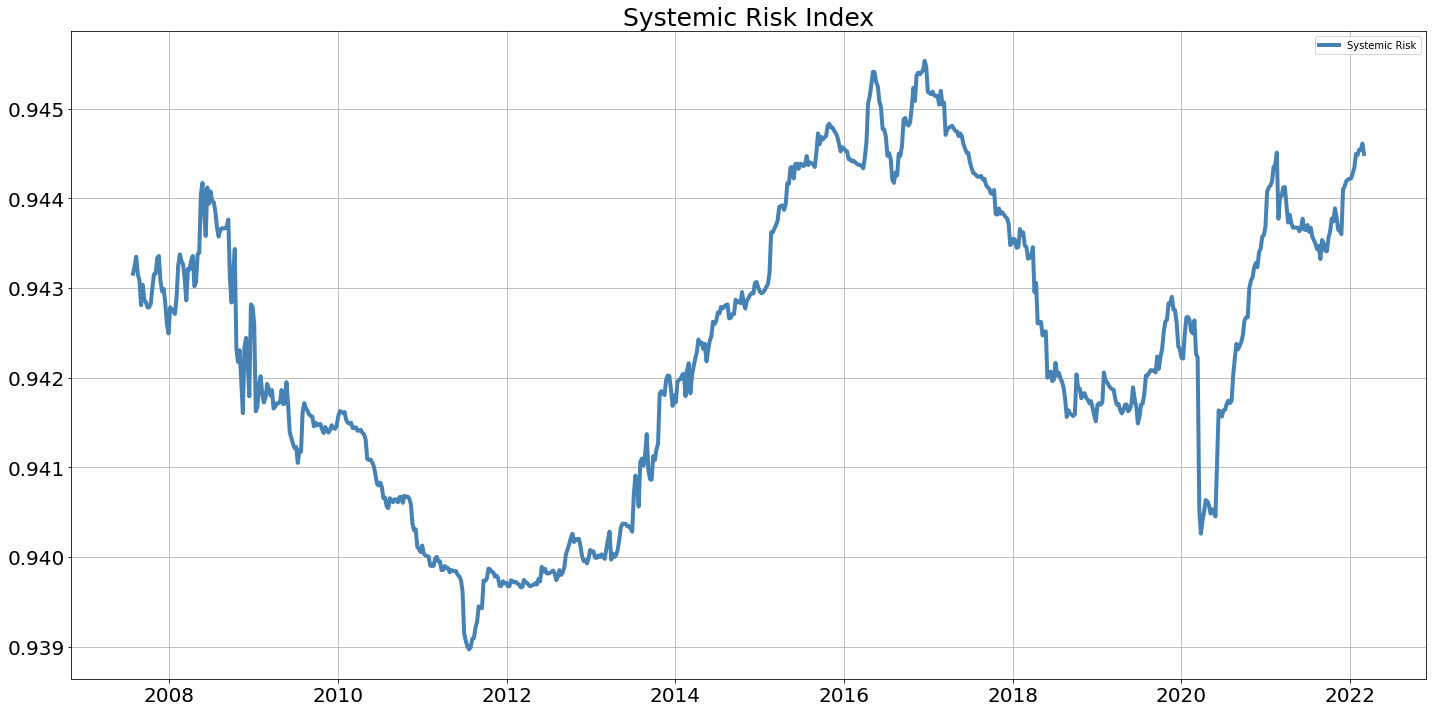

(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Systemic Risk Index'}>)

In [27]:
import utils
#absorbRatio = mri.calculate_systemic_risk(index_rets, window_size=250)
absorbRatio = mri.calculate_systemic_risk(returns, window_size=250)
utils.StandardLinePlot(absorbRatio.set_index('Dates'),"Systemic Risk Index",save=True)

In [23]:
turbulence = turbulence.join(vix)
turbulence

,Raw Turbulence,Turbulence,VIX Index
Dates,,,
2007-07-27,1.2e+02,1.2e+02,2.4e+01
2007-08-03,2.2e+02,1.3e+02,2.5e+01
2007-08-10,4.3e+02,1.5e+02,2.8e+01
2007-08-17,3.9e+02,1.6e+02,3e+01
2007-08-24,1.5e+02,1.6e+02,2.1e+01
...,...,...,...
2022-02-04,3.3e+01,3.4e+01,2.3e+01
2022-02-11,5.4e+01,3.5e+01,2.7e+01
2022-02-18,3.1e+01,3.5e+01,2.8e+01


In [34]:
absorbRatio.set_index('Dates',inplace=True)

In [37]:
turbulence = turbulence.join(absorbRatio)
turbulence
#turbulence.drop(columns=['Systemic Risk', 'Dates'],inplace=True)

,Raw Turbulence,Turbulence,VIX Index,Systemic Risk
Dates,,,,
2007-07-27,1.2e+02,1.2e+02,2.4e+01,0.94
2007-08-03,2.2e+02,1.3e+02,2.5e+01,0.94
2007-08-10,4.3e+02,1.5e+02,2.8e+01,0.94
2007-08-17,3.9e+02,1.6e+02,3e+01,0.94
2007-08-24,1.5e+02,1.6e+02,2.1e+01,0.94
...,...,...,...,...
2022-02-04,3.3e+01,3.4e+01,2.3e+01,0.94
2022-02-11,5.4e+01,3.5e+01,2.7e+01,0.94
2022-02-18,3.1e+01,3.5e+01,2.8e+01,0.94


In [24]:
#ax.secondary_yaxis()
import matplotlib.pyplot as plt
from cycler import cycler

def TurbPlot(graph_data,plot_title,include_lines="",win=120,save=False):
    '''
    Standardized Line Plot with "onbrand" color scheme/theme
    Arguments:
        graph_data: needs to be a DF currently
        plot_title: string
        save: optional, names the file the plot_title
    Returns:
        fig, ax: for further customization if needed
    '''
    fig, ax = plt.subplots(3,figsize=(20,10))
    parameters = {'xtick.labelsize': 20,'ytick.labelsize': 20,'figure.titlesize': 25}
    plt.rcParams.update(parameters)
    fig.suptitle(plot_title,fontsize=25)    
#    ax.set_prop_cycle(cycler('color',['#4682b4','#b0c4de','#87cefa','#708090','#778899']))
    
    #ax.set_prop_cycle(cycler('color',['#4682b4','#b0c4de','#87cefa']))
    ax[0].plot(graph_data[['Raw Turbulence','Turbulence']],linewidth=4)  # [['Raw Turbulence','Turbulence']]
    ax[0].legend(graph_data[['Raw Turbulence','Turbulence']].columns.values)
    plt.grid()


    ax[1].plot(graph_data[['VIX Index']],linewidth=4)  # [['Raw Turbulence','Turbulence']]
    ax[1].legend(graph_data[['VIX Index']].columns.values)
    plt.grid()
#    plt.title(plot_title,fontsize=25)

#    absorbRatio.set_index('Dates',inplace=True)
    ax[2].plot(absorbRatio,linewidth=4)  # [['Raw Turbulence','Turbulence']]
    ax[2].legend(absorbRatio.columns.values)
    plt.grid()
    #plt.title(plot_title,fontsize=25)

    
    #ax.secondary_yaxis(graph_data[['VIX Index']],linewidth=4)
    
#    try:
#        plt.legend(graph_data.columns.values) 
#    except:
#        print("not a dataframe")
    plt.tight_layout()
    plt.show()
    if save:
        fig.savefig(plot_title+'.png',format="png")
    return fig, ax

<module 'MacroRiskIndictators' from 'C:\\Users\\jknechtel\\Miniconda3\\GSS\\MacroRiskIndictators.py'>

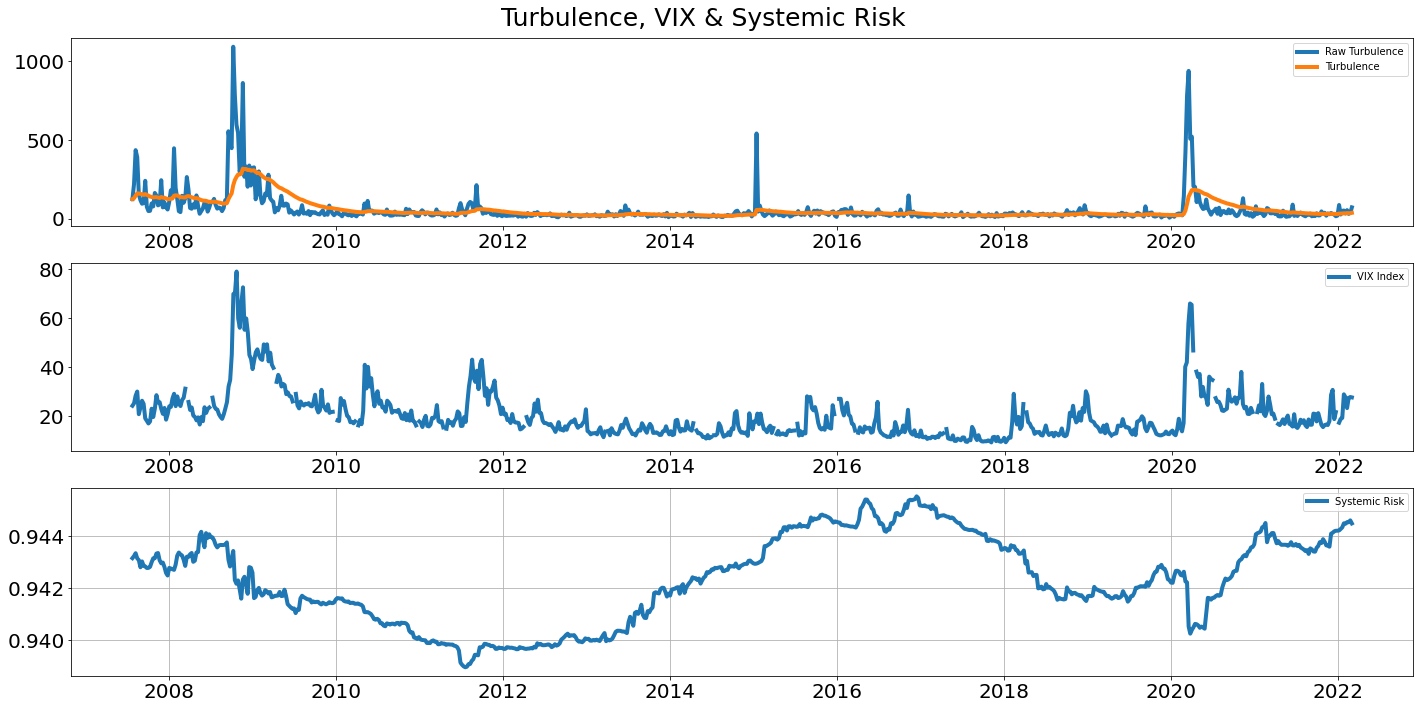

(<Figure size 1440x720 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

In [38]:
importlib.reload(mri)
mri.TurbPlot(turbulence,"Turbulence, VIX & Systemic Risk",save=True)

# Previous Labels

In [21]:
#proxies = pd.read_excel('H:/Asset Allocation/Data/Proxies.xlsx',sheet_name="map")
proxies.drop(columns = proxies.loc[:,'Unnamed: 7':'Unnamed: 17'].columns,inplace=True)
proxies

NameError: name 'proxies' is not defined

# Terrence Zhang's code

In [11]:
%run C:/Users/jknechtel/Miniconda3/Turbulence-and-Systemic-Risk-master/TurbulenceSuite_master.py


Requesting data from Yahoo Finance...
Currently pulling data for ^FTSE (FTSE100)
Currently pulling data for ^N225 (Nikkei225)
Currently pulling data for ^GDAXI (DAX)
Currently pulling data for ^FCHI (CAC40)
Currently pulling data for ^HSI (HangSeng)
Currently pulling data for ^BVSP (Bovespa)
Currently pulling data for ^RUT (Russell2000)
Currently pulling data for IXY (ConsumerDisc)
Currently pulling data for IXR (ConsumerStaples)
Currently pulling data for IXE (Energy)
Currently pulling data for IXM (Financials)
Currently pulling data for IXV (Healthcare)
Currently pulling data for IXT (Tech)
Currently pulling data for IXB (Materials)
Currently pulling data for IXU (Utilities)
Currently pulling data for ^IRX (13W_UST)
Currently pulling data for ^FVX (5Y_UST)
Currently pulling data for ^TNX (10Y_UST)
Currently pulling data for ^TYX (30Y_UST)
Currently pulling data for VWEHX (HY_Corp)
Currently pulling data for VFSTX (ShortTerm_IG_Corp)
Currently pulling data for VWESX (LongTerm_IG_Corp